# Customer Segmentation
Customer Segmentation is a grouping customers based on similiar characteristic. So, one of the output of this project is to make a group that can represent the condition of customer. The dataset used in this project comes from the [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset) dataset.

## **Data Understanding**

The data in this project comes from [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset). 

**About this Dataset**: Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Shop Customer dataset has 8 variables and description of these variables are as follows.

|Variable | Description|
|---|---|
|Customer ID	|	Unique ID for every customer
|Gender	|	Gender of a customer
|Age	|	Age of customer
|Annual Income ($)	|	Annual Income of a customer
|Spending Score	|	Score assigned by the shop, based on customer behavior and spending nature
|Proffesion	|	Proffesion of a customer
|Work Experience	| In years
|Family Size	|	Family members of a customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
data=pd.read_csv('Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
data.shape

(2000, 8)

In [ ]:
data.duplicated().sum()

0

In [ ]:
Female = data[data['Gender']=='Female']
Male= data[data['Gender']=='Male']

In [ ]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,965.944882,53.695777,107728.226772,50.430923,4.865784,3.727273
std,590.520034,21.311237,46216.356663,27.671898,3.409712,1.961501
min,2.000000,20.000000,1000.000000,1.000000,0.000000,1.000000
25%,430.000000,35.000000,71322.000000,27.000000,1.000000,2.000000
50%,971.000000,53.000000,104494.000000,49.000000,5.000000,4.000000
75%,1469.000000,70.000000,146350.000000,74.000000,7.000000,5.000000
max,2000.000000,99.000000,189945.000000,100.000000,17.000000,9.000000


In [ ]:
Female.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,956.127711,53.254217,106843.928916,50.439759,4.771084,3.677108
std,587.815519,21.027622,46921.875500,27.596404,3.392766,1.955927
min,3.000000,20.000000,1000.000000,1.000000,0.000000,1.000000
25%,420.500000,35.000000,69857.500000,28.000000,1.000000,2.000000
50%,948.500000,52.000000,104861.000000,49.000000,5.000000,4.000000
75%,1460.500000,68.000000,145938.000000,75.000000,7.000000,5.000000
max,1996.000000,99.000000,189672.000000,100.000000,17.000000,8.000000


In [ ]:
Male.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,980.315697,54.342152,109022.701587,50.417989,5.004409,3.800705
std,594.684310,21.722211,45173.618516,27.806434,3.432653,1.969054
min,2.000000,20.000000,4000.000000,1.000000,0.000000,1.000000
25%,449.000000,36.000000,75569.500000,27.000000,1.000000,2.000000
50%,996.000000,54.000000,103531.000000,50.000000,5.000000,4.000000
75%,1488.500000,72.000000,147867.500000,74.000000,7.000000,5.000000
max,2000.000000,99.000000,189945.000000,100.000000,17.000000,9.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
cat=['Gender','Profession']

for x in cat:
  print(f'''Value Count Variable {x}: ''')
  print(data[x].value_counts())
  print('=====================')
  print()

Value Count Variable Gender: 
Female    1186
Male       814
Name: Gender, dtype: int64

Value Count Variable Profession: 
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64



The majority of customers who shop are women, which is around 60% of the data or 1186 customers, while the remaining 814 are male.
Most customer jobs are as Artists and the least customers work as Marketing and Homemakers

## Preprocessing Data

In [ ]:
data.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

There is 35 missing values on Profession variables. So, there is 35 unknown customer's professions and we decided to delete these 35 data.

In [ ]:
data[data['Profession'].isna()]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [ ]:
#delete unknown profession
data = data.dropna()
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [ ]:
data[data['Age']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7
821,822,Female,0,116759,28,Marketing,7,3


There are 23 customers aged 0 years, in which the majority of the data are female and are already working. So there is a possibility that an error occurs when doing data entry.

### **Preprocessing Annual Income**

In [ ]:
data[data['Annual Income ($)']==0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
169,170,Male,32,0,63,Artist,2,2
246,247,Male,23,0,96,Doctor,1,3


Then, there are two customers who have an income of $ 0, where the two customers work as artists and doctors. So to handling this situation, we are going to substituting the average value of the income in each profession.
- the average value of income as a Doctor is 111573.22 dollars.
- the average value of income as an Artist is 108776.58 dollars.

In [ ]:
#subtitusi nilai pemasukan artist dan dokter, yang sebelumnya jumlah pemasukan sama dengan $0
data.loc[
    ((data['Profession'] == 'Doctor') & (data['Annual Income ($)']==0)), 'Annual Income ($)'] = 111573.22
data.loc[
    ((data['Profession'] == 'Artist') & (data['Annual Income ($)']==0)), 'Annual Income ($)'] = 108776.58

### **Preprocessing Age**

This analysis will focus on customers aged more than equal to 20 years.
- So that for 380 customer data with age less than 20 years will be deleted.
- Based on the data, it is assumed that the majority of customers have working status.
- As well as considering that the average maximum retirement age in the world is 70 years. Thus, 194 customers who are over 80 years old and have professions other than "Artist" and "Entertainment" will be removed.
> **This is also because considering the maximum value of Work Experience is 17 years, so for customers over 80 or 90 years of age who work other than "Artist" and "Entertainment" is a Data Entry error.**

In [ ]:
#delete Age<20
data= data[data['Age']>=20]

In [ ]:
#Number of customer age above 80
data[data['Age']>80].shape

(368, 8)

In [ ]:
#Number of customer age above 80 and have a profession beside Artist and Entertainment
data[((data['Age']>80) & (data['Profession']!='Artist')) & ((data['Age']>80) & (data['Profession']!='Entertainment'))].shape

(194, 8)

In [ ]:
#delete Age > 80, whose profession is other than “Artist” and “Entertainment” 
data = data[(data['Age']<=80) | ((data['Age']<100) & (data['Profession']=='Artist')) | ((data['Age']<=100) & (data['Profession']=='Entertainment'))]
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1,2,Male,21,35000.0,81,Engineer,3,3
2,3,Female,20,86000.0,6,Engineer,1,1
3,4,Female,23,59000.0,77,Lawyer,0,2
4,5,Female,31,38000.0,40,Entertainment,2,6
5,6,Female,22,58000.0,76,Artist,0,2
...,...,...,...,...,...,...,...,...
1991,1992,Female,97,129444.0,96,Entertainment,5,6
1993,1994,Female,64,175254.0,100,Artist,9,5
1995,1996,Female,71,184387.0,40,Artist,8,7
1998,1999,Male,77,182109.0,4,Executive,7,2


After the preprocessing of the Age variable has been carried out, the next step is to categorize age to make it easier to preprocess the Work Experience variable.

In [ ]:
# #Categorize Age
# bins= [0,30,40,50,60, 90]
# labels = ['Twenty','Thirty','Fourty','Fifty', 'Sixty and Above Sixty']
# data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
# data



#mengkategorikan usia
data.loc[
    ((data['Age'] >= 20) & (data['Age']<30)), 'category_age'] = 'Twenty'
data.loc[
    ((data['Age'] >= 30) & (data['Age']<40)), 'category_age'] = 'Thirty'
data.loc[
    ((data['Age'] >= 40) & (data['Age']<50)), 'category_age'] = 'Forty'
data.loc[
    ((data['Age'] >= 50) & (data['Age']<60)), 'category_age'] = 'Fifty'
data.loc[
    ((data['Age'] >= 60) & (data['Age']<70)), 'category_age'] = 'Sixty'
data.loc[
    ((data['Age'] >= 70) & (data['Age']<80)), 'category_age'] = 'Seventy'
data.loc[
    ((data['Age'] >= 80)), 'category_age'] = 'Above Eighty'

data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,category_age
1,2,Male,21,35000.0,81,Engineer,3,3,Twenty
2,3,Female,20,86000.0,6,Engineer,1,1,Twenty
3,4,Female,23,59000.0,77,Lawyer,0,2,Twenty
4,5,Female,31,38000.0,40,Entertainment,2,6,Thirty
5,6,Female,22,58000.0,76,Artist,0,2,Twenty
...,...,...,...,...,...,...,...,...,...
1991,1992,Female,97,129444.0,96,Entertainment,5,6,Above Eighty
1993,1994,Female,64,175254.0,100,Artist,9,5,Sixty
1995,1996,Female,71,184387.0,40,Artist,8,7,Seventy
1998,1999,Male,77,182109.0,4,Executive,7,2,Seventy


### **Preprocessing Work Experience**

There are 301 data that have a Work Experience value equal to zero.
- Preprocessing work experience needs to be done because, as before, it is feared that a data entry error where there is a customer who is a doctor with an age of 80 but the work experience value is equal to zero.
- There are 43 other data that have a work experience equal to zero, namely customers aged 20–30 years.
- So taking into account that at that age, the customer is still a job seeker or has just started working,
- The amount of data to be corrected for the work experience value is 258 data points.


In [ ]:
data[data['Work Experience']==0].shape

(301, 9)

- To resolve the value of Work Experience, the steps used are to pay attention to the median value of Work Experience found in certain age categories for all professions.
- Thus, the Work Experience value, which is equal to zero, will be replaced with the median value, taking into account the provisions described in the previous point.

In [ ]:
data[(data['category_age']=='Above Eighty')&(data['Work Experience']!=0)&(data['Profession']=='Engineer')].describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2.000000,2.0,2.000000,2.000000,2.000000,2.000000
mean,230.500000,80.0,29500.000000,63.000000,5.000000,3.500000
std,28.991378,0.0,13435.028843,42.426407,5.656854,0.707107
min,210.000000,80.0,20000.000000,33.000000,1.000000,3.000000
25%,220.250000,80.0,24750.000000,48.000000,3.000000,3.250000
50%,230.500000,80.0,29500.000000,63.000000,5.000000,3.500000
75%,240.750000,80.0,34250.000000,78.000000,7.000000,3.750000
max,251.000000,80.0,39000.000000,93.000000,9.000000,4.000000


In [ ]:
#subtitusi nilai 'Work Experience'==0


#category_age=Thirty
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Healthcare')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 5.5
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Doctor')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Lawyer')), 'Work Experience'] = 1
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Marketing')), 'Work Experience'] = 1
data.loc[
    ((data['category_age'] == 'Thirty') & (data['Work Experience']==0) & (data['Profession']=='Homemaker')), 'Work Experience'] = 5


#category_age=Forty
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Healthcare')), 'Work Experience'] = 6.5
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 5.5
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Doctor')), 'Work Experience'] = 5.5
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Lawyer')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Marketing')), 'Work Experience'] = 1
data.loc[
    ((data['category_age'] == 'Forty') & (data['Work Experience']==0) & (data['Profession']=='Homemaker')), 'Work Experience'] = 9

#category_age=Fifty
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Healthcare')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 6
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Doctor')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Lawyer')), 'Work Experience'] = 3.5
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Marketing')), 'Work Experience'] = 4.5
data.loc[
    ((data['category_age'] == 'Fifty') & (data['Work Experience']==0) & (data['Profession']=='Homemaker')), 'Work Experience'] = 8


#category_age=Sixty
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Healthcare')), 'Work Experience'] = 6
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Doctor')), 'Work Experience'] = 4
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 7
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Lawyer')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Marketing')), 'Work Experience'] = 7
data.loc[
    ((data['category_age'] == 'Sixty') & (data['Work Experience']==0) & (data['Profession']=='Homemaker')), 'Work Experience'] = 8


#category_age=Seventy
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Healthcare')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 7
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Doctor')), 'Work Experience'] = 5.5
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 7.5
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Lawyer')), 'Work Experience'] = 3
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Marketing')), 'Work Experience'] = 2
data.loc[
    ((data['category_age'] == 'Seventy') & (data['Work Experience']==0) & (data['Profession']=='Homemaker')), 'Work Experience'] = 8

#category_age=Above Eighty
data.loc[
    ((data['category_age'] == 'Above Eighty') & (data['Work Experience']==0) & (data['Profession']=='Artist')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Above Eighty') & (data['Work Experience']==0) & (data['Profession']=='Entertainment')), 'Work Experience'] = 2.5
data.loc[
    ((data['category_age'] == 'Above Eighty') & (data['Work Experience']==0) & (data['Profession']=='Engineer')), 'Work Experience'] = 5
data.loc[
    ((data['category_age'] == 'Above Eighty') & (data['Work Experience']==0) & (data['Profession']=='Executive')), 'Work Experience'] = 5



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1397 non-null   int64  
 1   Gender                  1397 non-null   object 
 2   Age                     1397 non-null   int64  
 3   Annual Income ($)       1397 non-null   float64
 4   Spending Score (1-100)  1397 non-null   int64  
 5   Profession              1397 non-null   object 
 6   Work Experience         1397 non-null   float64
 7   Family Size             1397 non-null   int64  
 8   category_age            1397 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 109.1+ KB


## EDA

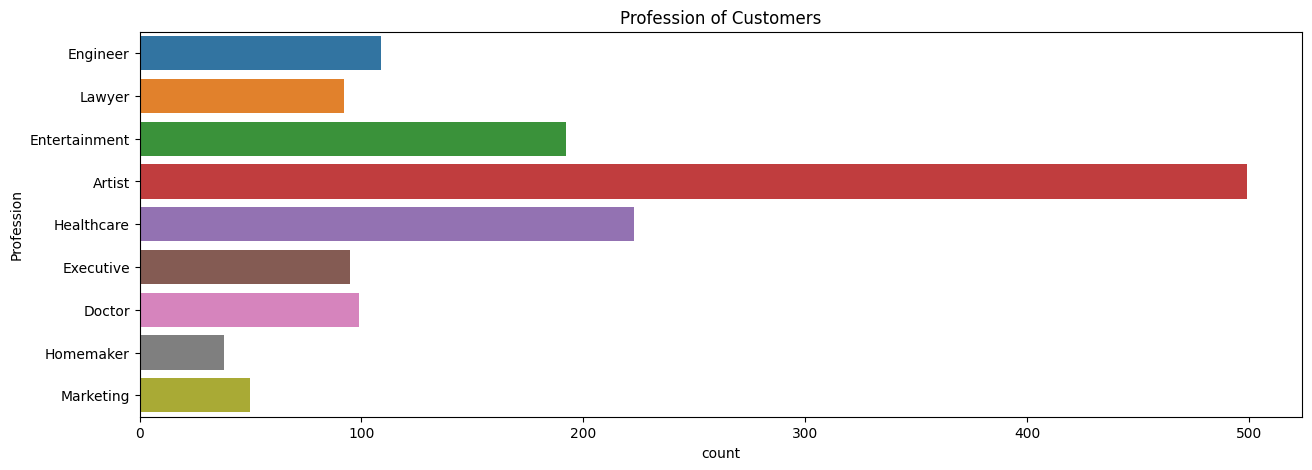

In [ ]:
#Profession
plt.figure(1,figsize=(15,5))
sns.countplot(y='Profession', data=data)
# data['Profession'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(5,5))
plt.title('Profession of Customers')
plt.show()

<Axes: xlabel='Profession', ylabel='count'>

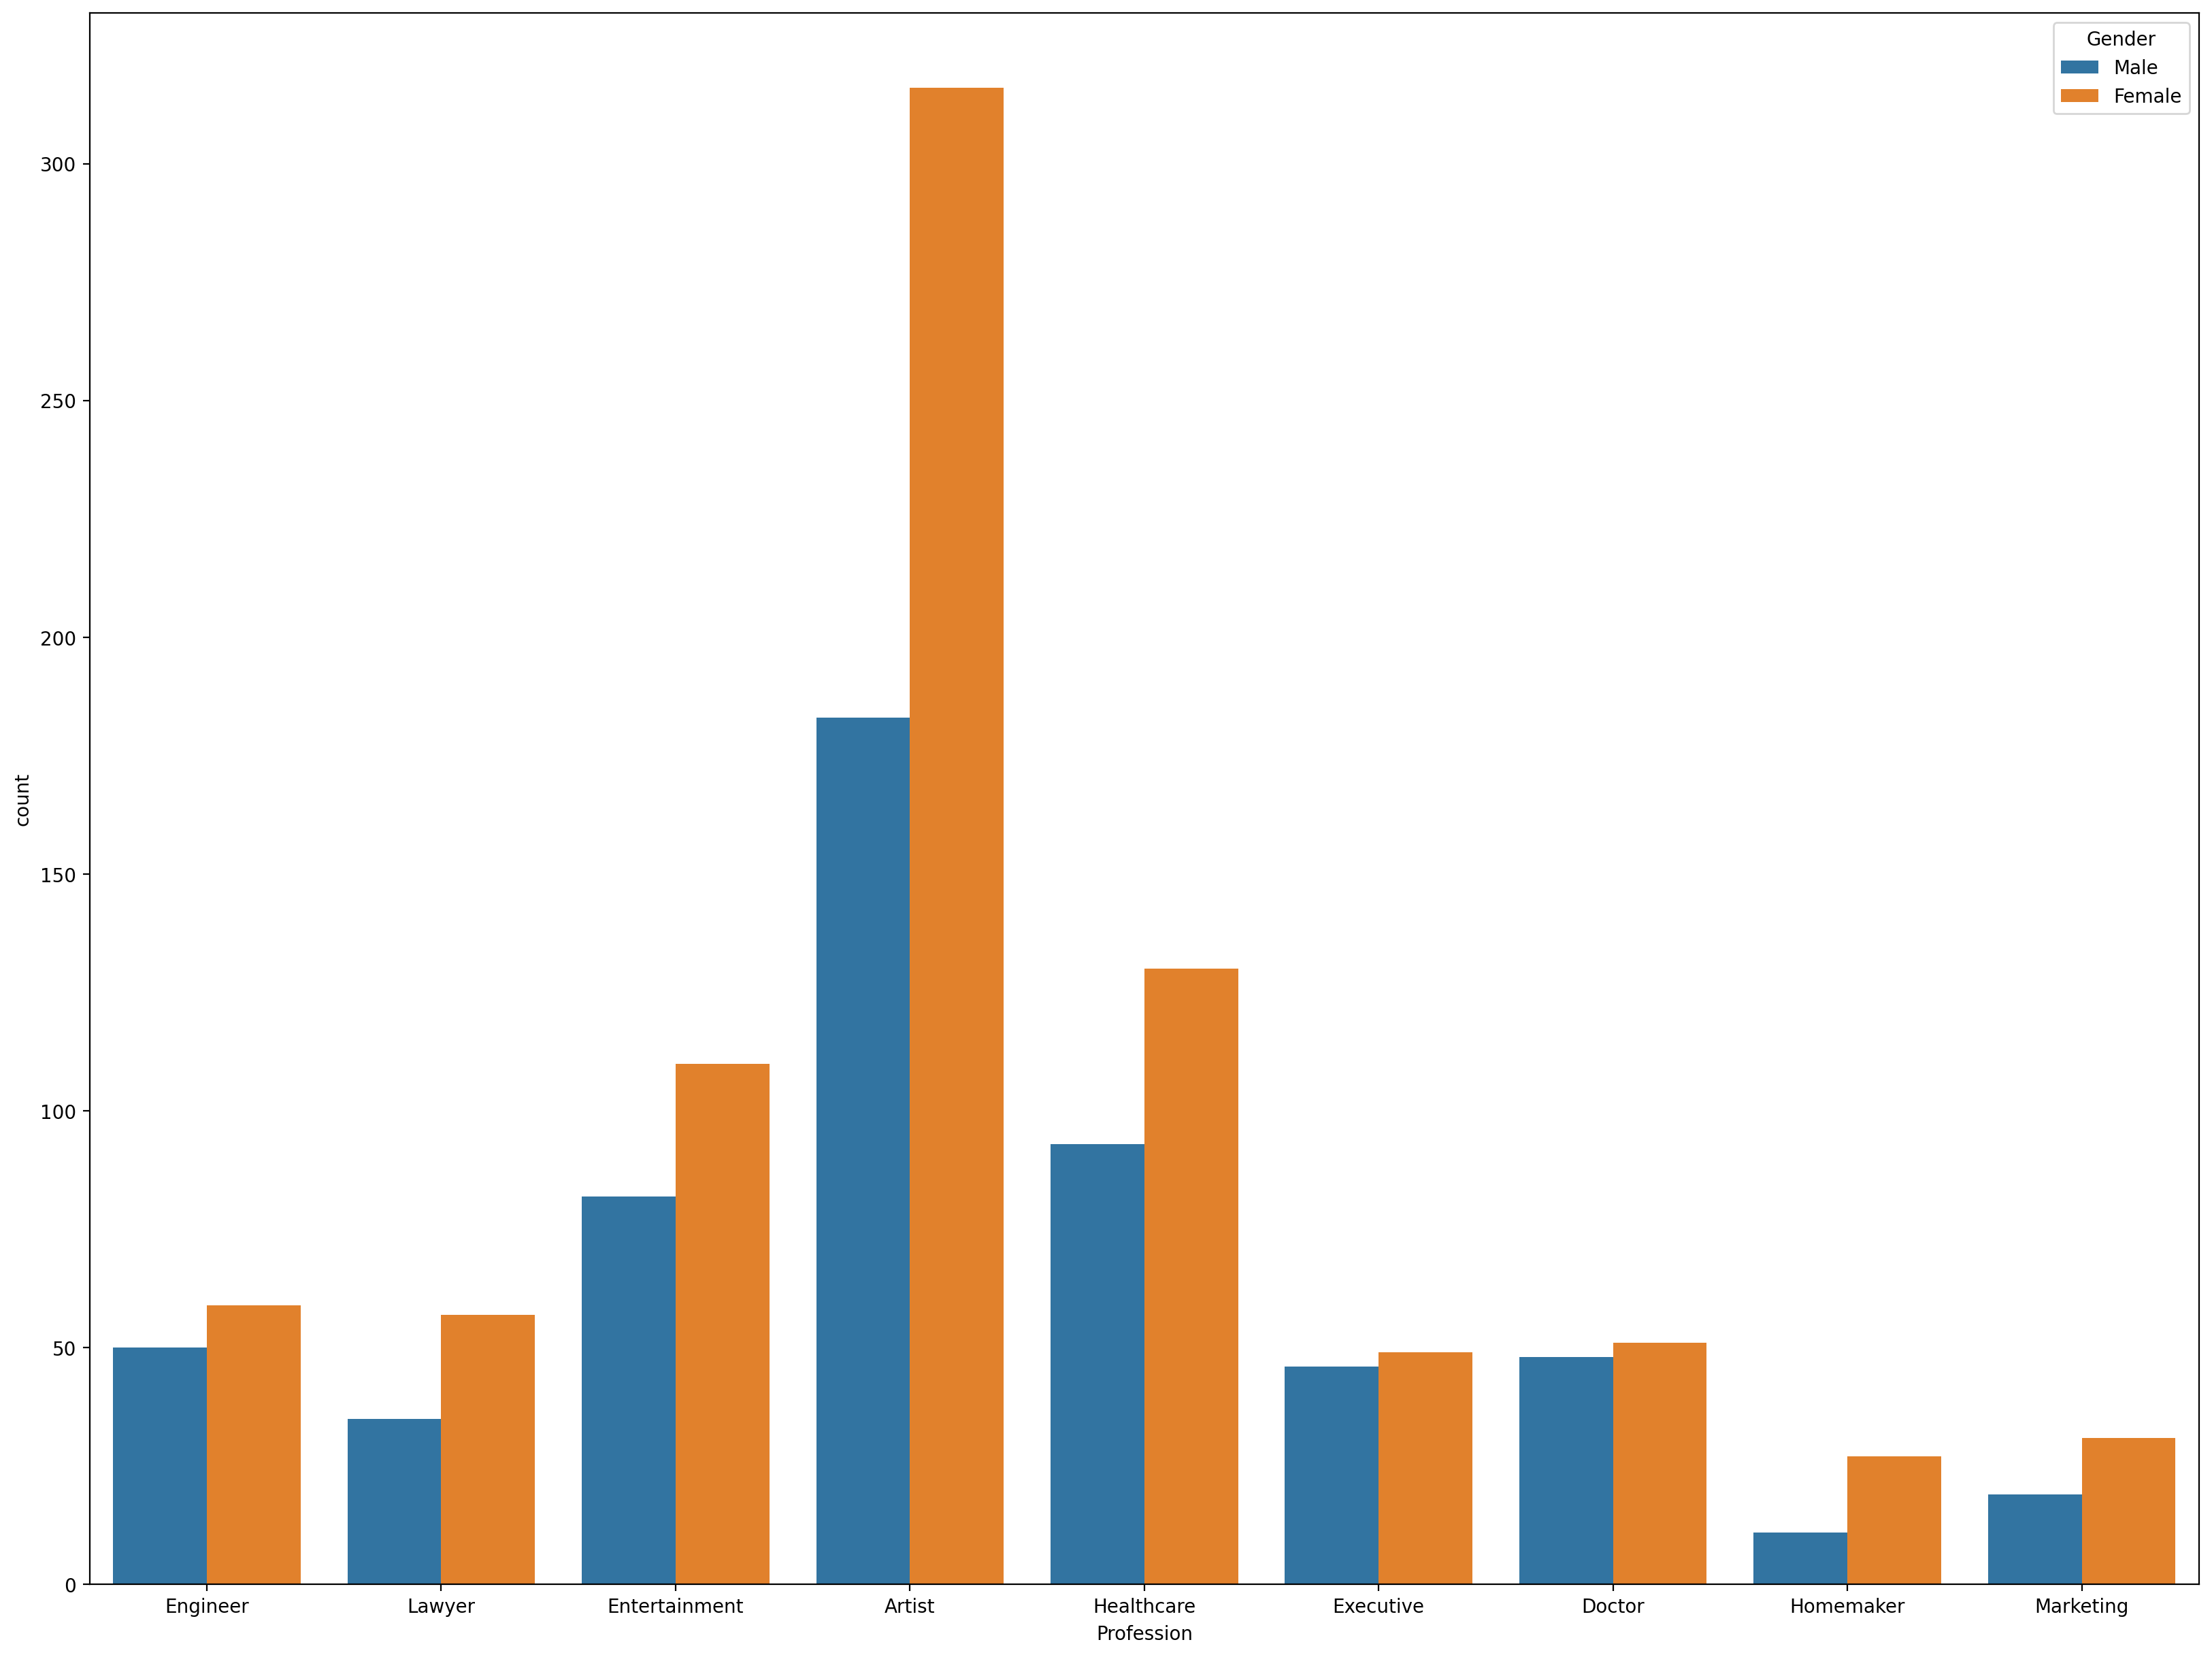

In [ ]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = data,x="Profession",hue="Gender")

In [ ]:
list_of_role = ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing']
x = 1
for i in list_of_role:
    df_profession = data[data.Profession==i]
    average_salary = df_profession['Annual Income ($)'].mean()
    print(x, 'Annual Income average of', i, 'is', round(average_salary, 2))
    x += 1

1 Annual Income average of Healthcare is 109697.58
2 Annual Income average of Engineer is 106584.55
3 Annual Income average of Lawyer is 102184.63
4 Annual Income average of Entertainment is 110551.01
5 Annual Income average of Artist is 106855.84
6 Annual Income average of Executive is 111366.58
7 Annual Income average of Doctor is 107487.36
8 Annual Income average of Homemaker is 105196.08
9 Annual Income average of Marketing is 104993.76


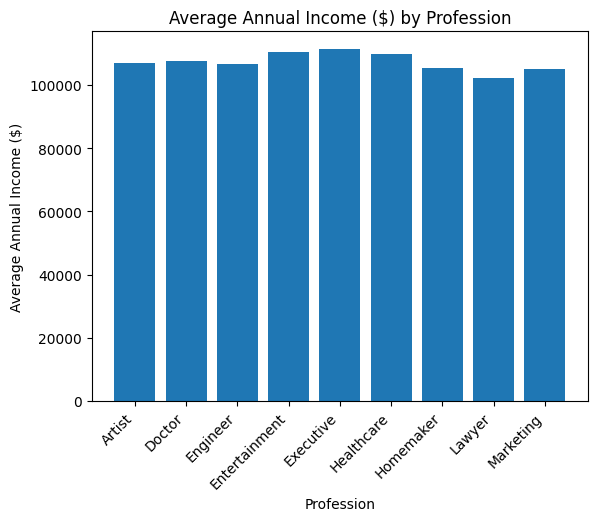

In [ ]:
# Calculate average Annual Income ($) by age group
age_groups = data.groupby('Profession')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['Annual Income ($)'])
plt.title('Average Annual Income ($) by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Annual Income ($)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

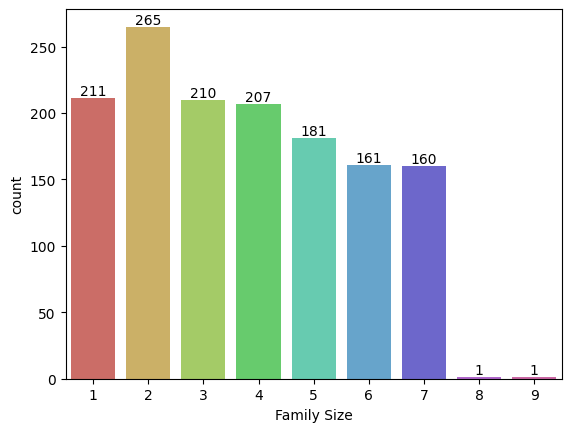

In [ ]:
ax = sns.countplot(x='Family Size', data=data, palette="hls")
ax.bar_label(ax.containers[0]);

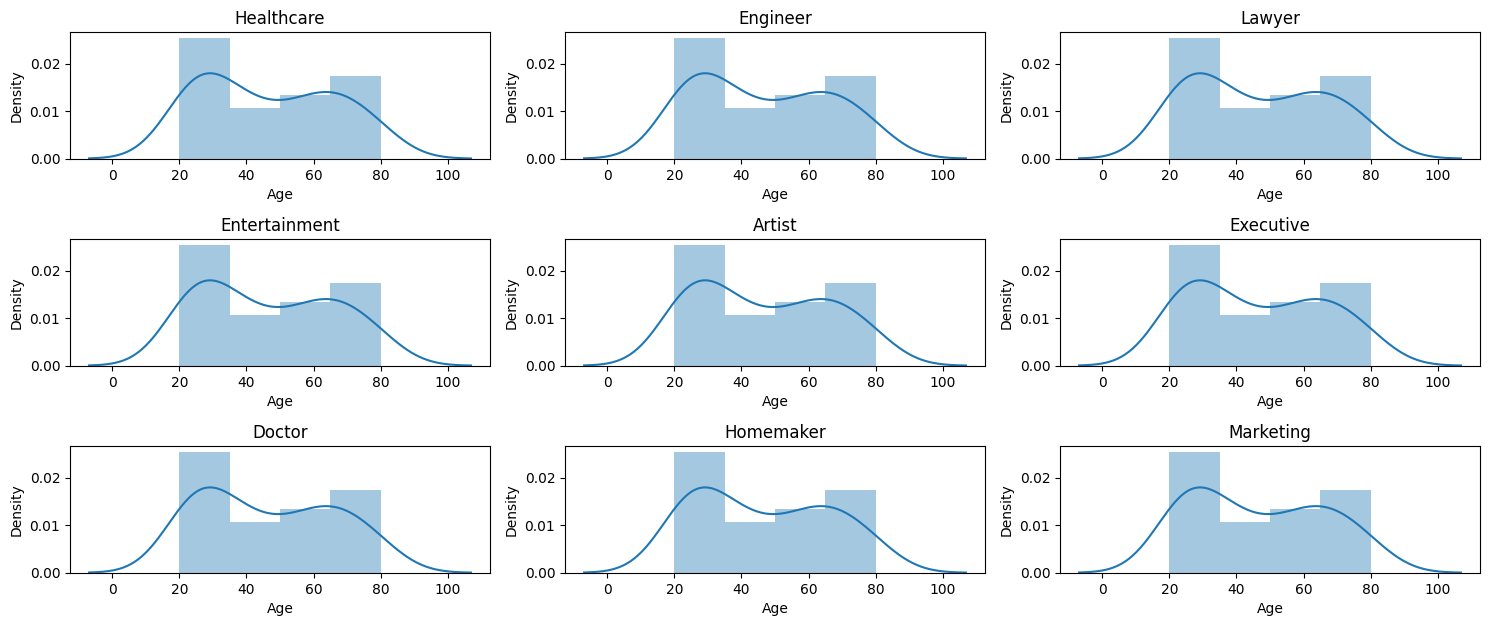

In [ ]:
plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    data_profession = data[data.Profession==i]
    plt.subplot(row, 3, number)
    sns.distplot(df_profession.Age)
    number += 1
    plt.title(i)
    plt.tight_layout();

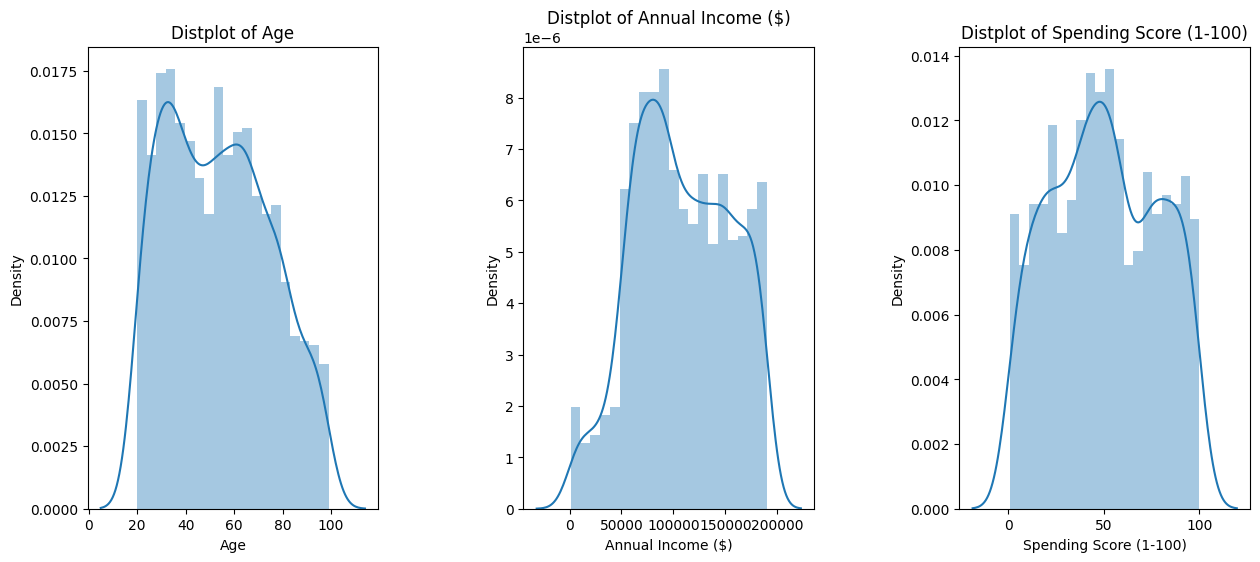

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income ($)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Text(0.5, 1.0, 'Gender of Customers')

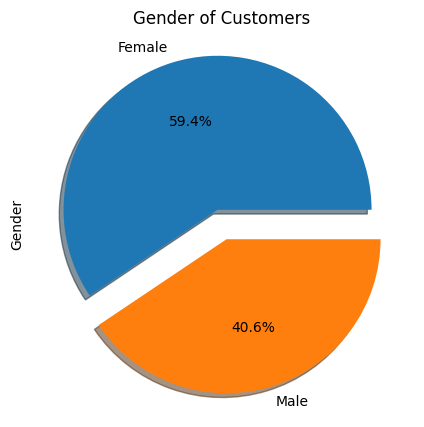

In [ ]:
#gender
data['Gender'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(5,5));
plt.title('Gender of Customers')

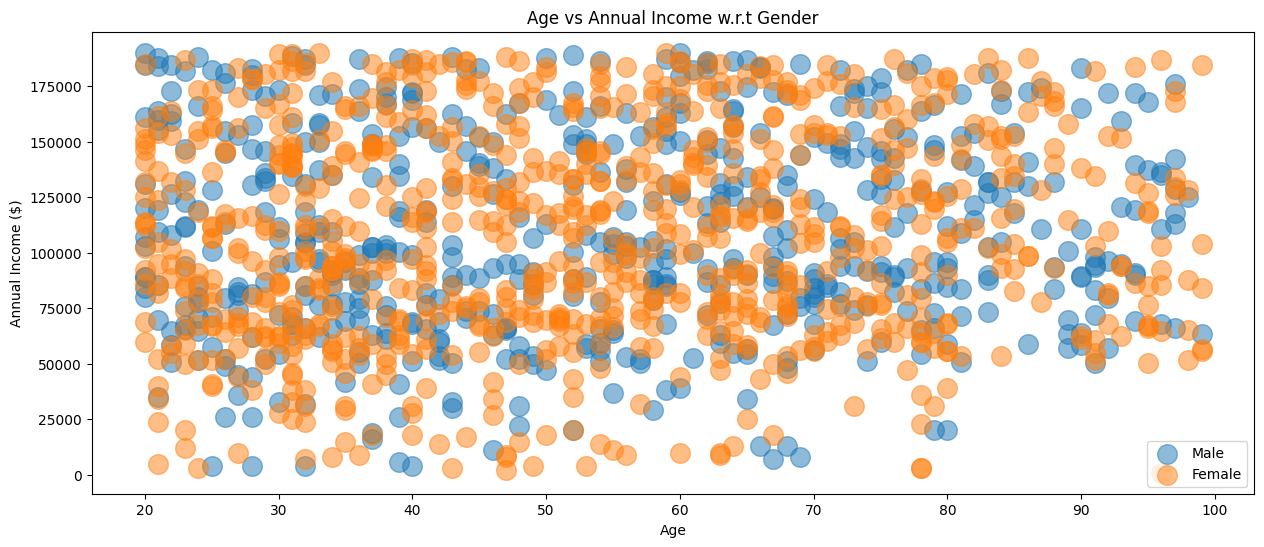

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income ($)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income ($)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

The value of monthly income with a value range of 500k–1000k dollars is dominated by female customers with an age range of 20–70 years.

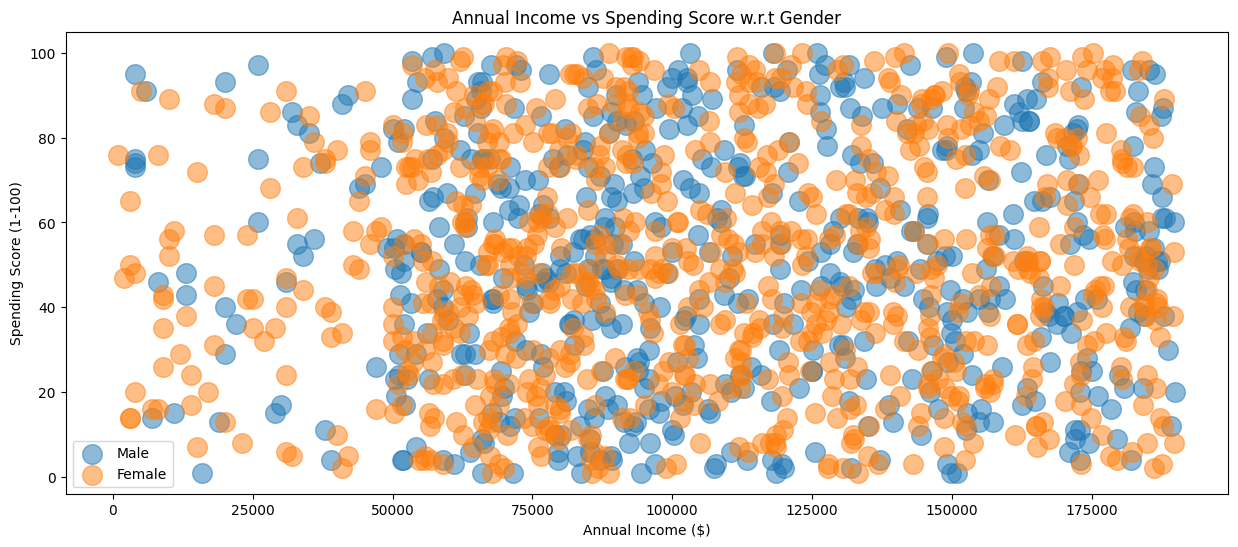

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income ($)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income ($)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Taking into account the amount of monthly income and the value of customer loyalty shown in the spending score variable. The information obtained indicates that the majority of customers with a monthly income in the range of $0—$500k are women, where the loyalty value tends to be low.

## Customer Segmentation with KMeans

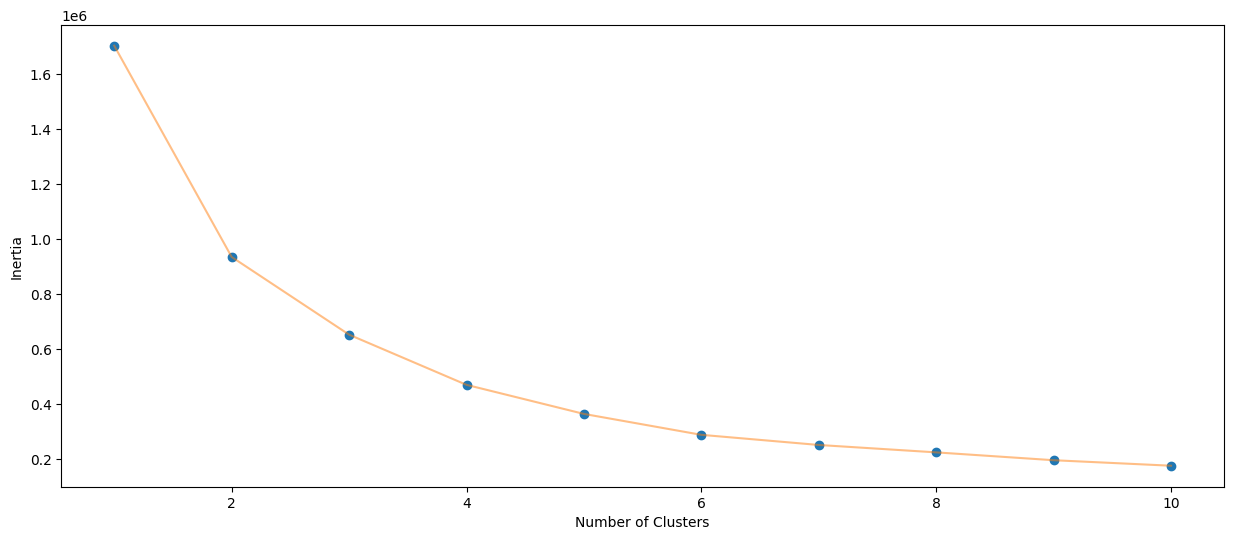

In [ ]:
#segmentation using age and Spending Score (1-100)

'''Age and Spending Score (1-100)'''
X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

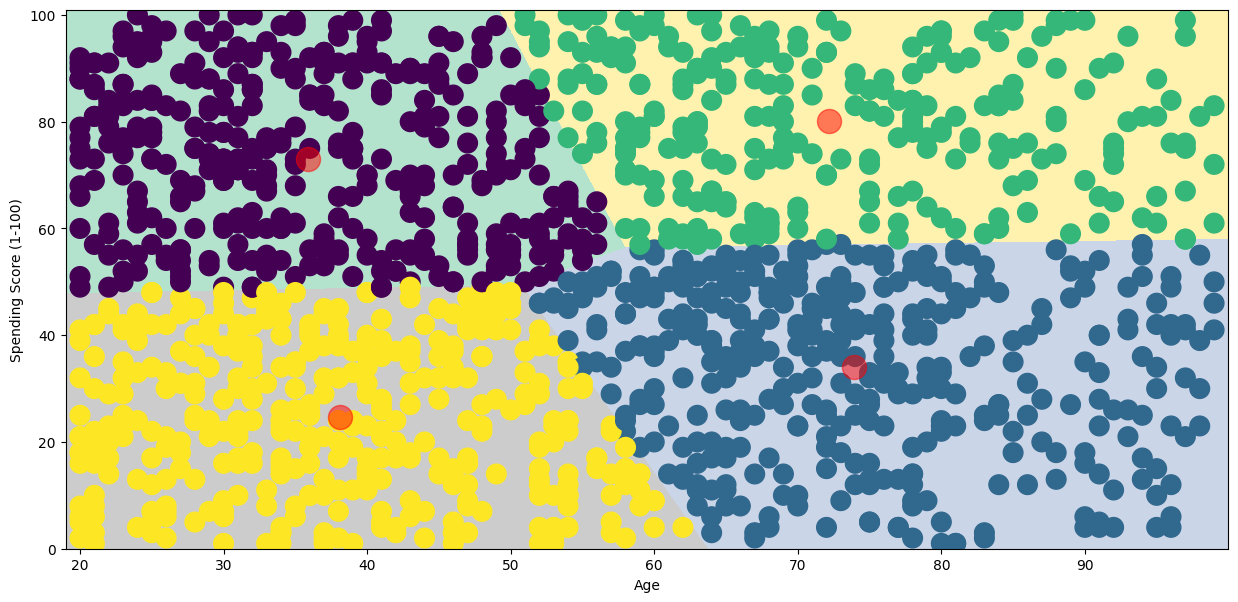

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

Based on the segmentation results, the majority of customers aged 20–60 have a fairly high loyalty value. Whereas for customers who are more than the age of 70 years have a fairly low loyalty value.

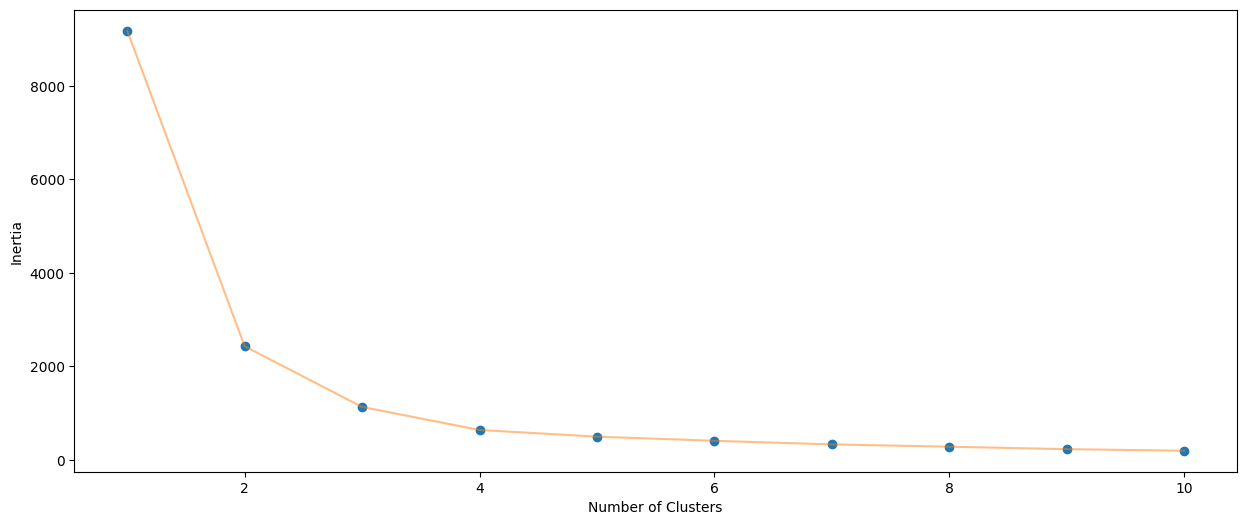

In [ ]:
#segmentation using Gender and Profession

labelEncoder=LabelEncoder()
data['Gender']=labelEncoder.fit_transform(data['Gender'])
data['Profession']=labelEncoder.fit_transform(data['Profession'])


'''Gender and Profession'''
X2 = data[['Gender' , 'Profession']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Gender' ,y = 'Profession' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Profession') , plt.xlabel('Gender')
plt.show()